In [9]:
# Importar librerias

import numpy as np
import matplotlib.pyplot as plt

In [40]:
def classical_particle_probability(self, x, V, T):
    """Classical particle probability.
    Args:
        x (float): position of the particle
        V (function): potential energy function
        T (float): temperature
    Returns:
        float: probability of the particle being at x"""
    beta = 1/T
    return np.exp(-beta*V(x))

In [41]:
class Quantum_Harmonic_Oscillator:
    """Class for getting the quantum harmonic oscillator information"""

    def potential(self, x):
        """Quamtum armonic oscillator potential
        
        Args:
            x (float): position of the particle
        Returns:
            float: value of the potential at x"""
        return 0.5*x**2
    
    def energy(self, n):
        """Quamtum armonic oscillator energy
        
        Args:
            n (int): energy level
        Returns:
            float: value of the energy"""
        return n + 0.5
    
    def wave_function(self, x, n):
        """Quamtum armonic oscillator wave function
        
        Args:
            x (float): position of the particle
            n (int): energy level
        Returns:
            float: value of the wave function at x"""
        arr = np.zeros(n+1)
        arr[n] = 1
        return (2**n*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)*np.exp(-0.5*x**2)*np.polynomial.hermite.Hermite(arr)(x)
    
    def probability_density(self, x, n):
        """Quamtum armonic oscillator probability density
        
        Args:
            x (float): position of the particle
            n (int): energy level
        Returns:
            float: value of the probability density at x"""
        return self.wave_function(x, n)**2
    


In [76]:
class Sampling:
    """Class for sampling methods"""
    def __init__(self) -> None:
        pass

    def metropolis(self, x, delta, n, probability, N_steps):
        """Metropolis algorithm
        Args:
            x (float): initial position
            delta (float): step size
            n (int): (energy level) quantum number
            probability (function): probability density function
            N_steps (int): number of steps
        Returns:
            xs: array of x values accepted"""

        xs = []

        for i in range(N_steps):

            x_new = x + np.random.uniform(-delta, delta)

            if np.random.uniform(0, 1) < probability(x_new, n)/probability(x, n):
                x = x_new
                xs.append(x)

        return np.array(xs)
    
    def metropolis_with_energy_jumps(self, n, x, delta, probability, beta, energy, N_steps):
        """Energy jump algorithm
        Args:
            x (float): initial position
            m (int): number of steps
            n (int): (energy level) quantum number
            probability (function): probability density function
            N_steps (int): number of steps
        Returns:
            xs: array of x values accepted"""

        xs = []
        ns = []

        for i in range(N_steps):

            for j in range(10000):
                x_new = x + np.random.uniform(-delta, delta)

                if np.random.uniform(0, 1) < probability(x_new, n)/probability(x, n):
                    x = x_new
                    xs.append([x, n])

                m = n + np.random.choice([-1, 1])

            if m > 0 and np.random.uniform(0, 1) < ( (probability(x, m)/probability(x, n)) * np.exp( - beta * (energy(m) - energy(n)) ) ) :
                n = m
                ns.append([m])

        return np.array(xs), np.array(ns)

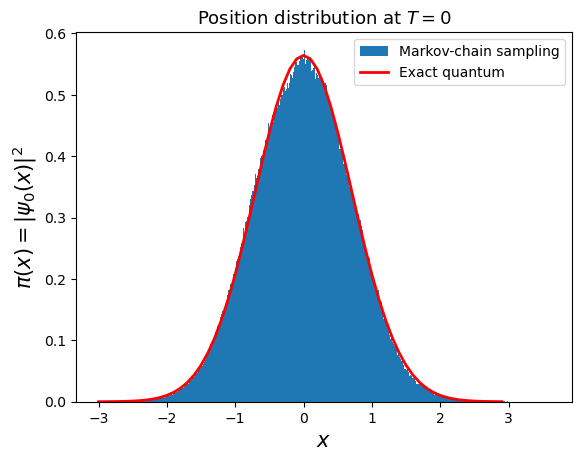

In [36]:
import random, math, pylab
from math import *

def psi_0_sq(x):
    psi = exp(- x ** 2.0 / 2.0) / pi ** (1.0 / 4.0)
    return abs(psi) ** 2.0

xx = 0.0
delta = 0.1
hist_data = []
for k in range(1000000):
    x_new = xx + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_0_sq(x_new) / psi_0_sq(xx): 
        xx = x_new 
        hist_data.append(xx)
    #print x
    
pylab.hist(hist_data, 500, density = True, label='Markov-chain sampling') #histogram of the sample
x = [a / 10.0 for a in range(-30, 30)]
y = [psi_0_sq(a) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0, label='Exact quantum')
pylab.title('Position distribution at $T=0$', fontsize = 13)
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)=|\psi_0(x)|^2$', fontsize = 15)
pylab.legend()
#pylab.savefig('plot_T0_prob.png')
#pylab.show()

In [37]:
np.random.seed(42)

pi = Quantum_Harmonic_Oscillator().probability_density
xs_samples = Sampling().metropolis(x=0.0, delta=0.1, n=0, probability=pi, N_steps=1000000)

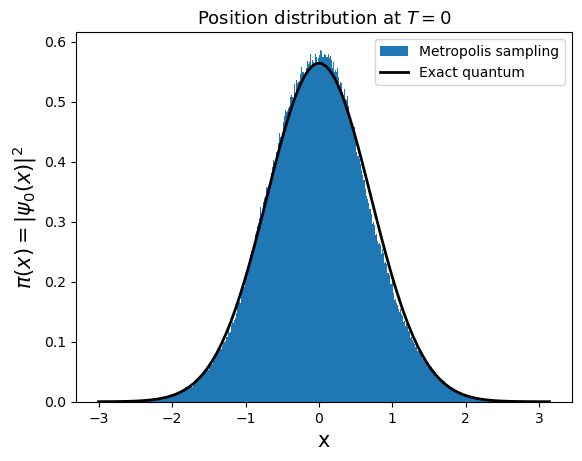

In [38]:
xs_grid = np.linspace(xs_samples.min(), xs_samples.max(), 100)
ys_grid = [pi(x, 0) for x in xs_grid]

plt.hist(xs_samples, 500, density = True, label='Metropolis sampling') #histogram of the sample
plt.plot(xs_grid, ys_grid, c='k', linewidth=2.0, label='Exact quantum')
plt.title('Position distribution at $T=0$', fontsize = 13)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$\pi(x)=|\psi_0(x)|^2$', fontsize = 15)
plt.legend()

In [77]:
xs, ns = Sampling().metropolis_with_energy_jumps(n=0, x=0.0, delta=0.1, probability=pi, beta=0.2, energy=Quantum_Harmonic_Oscillator().energy, N_steps=int(1e4))

/tmp/ipykernel_54240/4137001556.py:32: RuntimeWarning: overflow encountered in long_scalars
  return (2**n*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)*np.exp(-0.5*x**2)*np.polynomial.hermite.Hermite(arr)(x)
/tmp/ipykernel_54240/4137001556.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return (2**n*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)*np.exp(-0.5*x**2)*np.polynomial.hermite.Hermite(arr)(x)


In [72]:
def p_quant(x, beta):
    p_q = np.sqrt(np.tanh(beta/2.0)/np.pi) * np.exp(- x**2.0 * np.tanh(beta/2.0))
    return p_q

(array([1.57171707e-05, 1.57171707e-05, 6.91555509e-05, 6.60121168e-05,
        1.35167668e-04, 1.35167668e-04, 1.63458575e-04, 1.28880799e-04,
        1.72888877e-04, 2.79765638e-04, 3.80355530e-04, 3.58351491e-04,
        6.34973695e-04, 8.11006006e-04, 1.20393527e-03, 1.57171707e-03,
        2.16896955e-03, 2.77879577e-03, 3.16229474e-03, 4.19019770e-03,
        4.68371686e-03, 5.46014509e-03, 6.20199555e-03, 7.04443589e-03,
        7.61654091e-03, 8.05662168e-03, 9.56547007e-03, 1.08165569e-02,
        1.23536961e-02, 1.32872961e-02, 1.38153930e-02, 1.58177606e-02,
        1.68802413e-02, 1.78609927e-02, 1.88386008e-02, 2.11018733e-02,
        2.15168066e-02, 2.34751661e-02, 2.35286045e-02, 2.46130893e-02,
        2.48645640e-02, 2.64362811e-02, 2.80677234e-02, 2.90610486e-02,
        3.12960302e-02, 3.26948584e-02, 3.33015412e-02, 3.44866159e-02,
        3.62186481e-02, 3.82870277e-02, 3.91326115e-02, 4.14618962e-02,
        4.33353830e-02, 4.54257667e-02, 4.94650795e-02, 5.198925

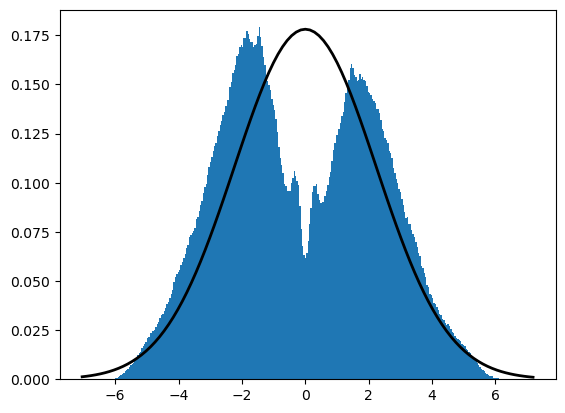

In [73]:
xs_grid = np.linspace(xns[:, 0].min()-0.5, xns[:, 0].max()+0.5, 100)
plt.plot(xs_grid, p_quant(xs_grid, 0.2), c='k', linewidth=2.0, label='Exact quantum')
plt.hist(xns[:, 0], bins=300, density=True)

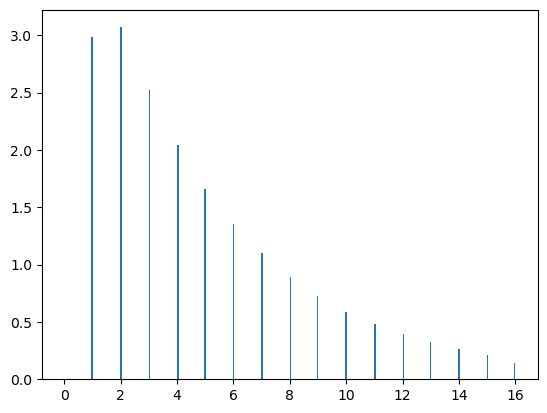

In [75]:
plt.hist(xns[:, 1], bins=300, density=True);